https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

## Sigmoid

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(757)

1.0

In [47]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset

#### Now that you have the dataset loaded you can use the commands below

In [48]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [49]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [50]:
digits.data.shape

(1797, 64)

In [51]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [52]:
import pandas as pd

df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


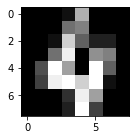

In [53]:
cuatro = df.iloc[4]
k = np.reshape(cuatro[:64].values, (8,8))
plt.imshow(k, cmap=plt.cm.gray)

In [54]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [55]:
#y = a + b1X1 + b2X2 + b... + b64*X64

In [56]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

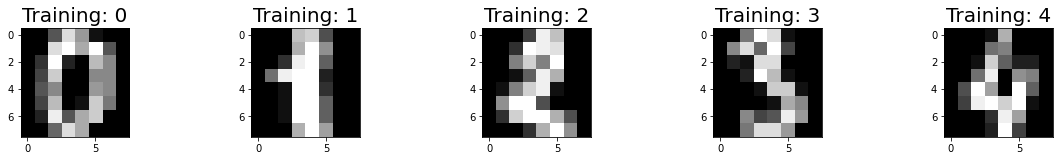

In [57]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: ' + str(label), fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.15, random_state=0)

In [59]:
x_train.shape

(1527, 64)

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [60]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [85]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [61]:
print(y_train[:5])

[3 6 4 6 3]


### To predict

In [62]:
logisticRegr.predict(x_train[:5])

array([3, 6, 4, 6, 3])

In [63]:
x_train[:5].shape

(5, 64)

In [64]:
x_test.shape

(270, 64)

In [65]:
y_test[:5]

array([2, 8, 2, 6, 6])

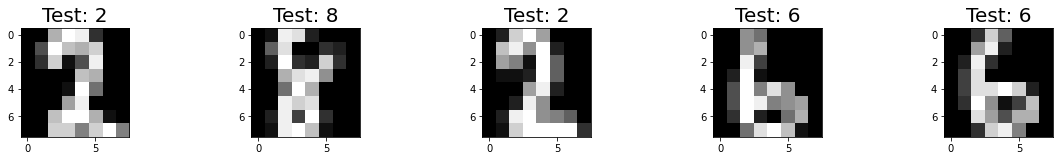

In [66]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Test: ' + str(label), fontsize = 20)

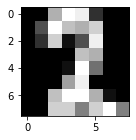

In [67]:
plt.rcParams['figure.figsize'] = 20 , 2
first_test_image = x_test[0]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray)

In [68]:
x_test[0].shape

(64,)

In [69]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1, -1))

array([2])

In [70]:
max(logisticRegr.predict_proba(x_test[0].reshape(1, -1))[0])

0.9999999992803705

In [71]:
y_test[0:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [72]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Probabilities

In [73]:
x_test[:1].shape

(1, 64)

In [74]:
logisticRegr.predict_proba(x_test[:1])

array([[3.16344904e-15, 1.98067990e-14, 9.99999999e-01, 6.25132727e-10,
        3.54579609e-18, 2.83904598e-12, 7.30834021e-19, 9.14285360e-11,
        2.05462492e-13, 8.35001302e-16]])

In [75]:
sum(logisticRegr.predict_proba(x_test[0:1])[0])

1.0000000000000002

In [76]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
max(logisticRegr.predict_proba(x_test[0:1])[0])

0.9999999992803705

### Measuring Model Performance (Digits Dataset)

In [78]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_train, y_train)
score

1.0

In [79]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

97.03703703703704 %


In [80]:
x_test.shape

(270, 64)

### Matriz de confusión

In [81]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[19  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  2]
 [ 0  1  0  0  0  0 33  0  0  0]
 [ 0  1  0  0  1  0  0 31  0  0]
 [ 0  2  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  1  0  0  0 32]]


Text(0.5, 1.0, 'Accuracy Score: 0.9703703703703703')

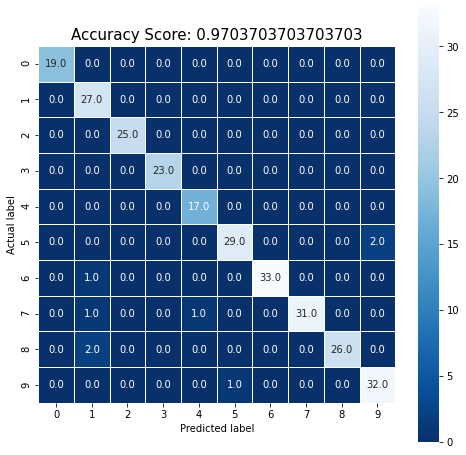

In [82]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [88]:
# Yo ya estoy contento con mi modelo:

# Ahora entreno el modelo con todos los datos que tengo
# Entreno el modelo con todos los datos
logisticRegr.fit(digits.data, digits.target)

# Predecimos con todos los datos que tenemos
y_pred = logisticRegr.predict(digits.target)
# Calculamos cuánto de bien ha entrenado con nuestros datos
logisticRegr.score(digits.target, y.values)

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2 ... 8 9 8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.